In [ ]:
import streamlit as st
from dotenv import load_dotenv
from langchain.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from langchain_core.messages import HumanMessage

load_dotenv()

st.title("📚 Research Paper Assistant - Dynamic PromptTemplate Example")

# Predefined topics
RESEARCH_TOPICS = [
    "Word2Vec", "BERT", "GPT", "Transformers", "LSTM",
    "Reinforcement Learning", "GANs", "Diffusion Models", "Quantum Computing"
]

# Difficulty levels
DIFFICULTY_LEVELS = ["Simple", "Medium", "Hard"]

# Creativity levels (mapped to temperature)
CREATIVITY_LEVELS = {"Low":0.0, "Medium":0.7, "High":1.2}

# User selections
topic_choice = st.selectbox("Choose a research topic:", RESEARCH_TOPICS)
difficulty_choice = st.selectbox("Choose difficulty:", DIFFICULTY_LEVELS)
creativity_choice = st.selectbox("Choose creativity level:", list(CREATIVITY_LEVELS.keys()))
model_choice = st.selectbox("Choose a model:", ["Mistral-7B-Instruct", "TinyLlama-1.1B-Chat"])

temperature = CREATIVITY_LEVELS[creativity_choice]

# Define a dynamic prompt template
template = """
Generate a detailed explanation on the research topic: "{topic}".
Difficulty Level: {difficulty}
Include relevant mathematical equations, derivations, or examples if applicable.
"""

prompt = PromptTemplate(
    input_variables=["topic", "difficulty"],
    template=template
)

dynamic_prompt = prompt.format(topic=topic_choice, difficulty=difficulty_choice)

# Generate response
if st.button("Generate Research Content"):
    with st.spinner("Generating..."):
        # Map model_choice to repo_id
        repo_map = {
            "Mistral-7B-Instruct": "mistralai/Mistral-7B-Instruct-v0.3",
            "TinyLlama-1.1B-Chat": "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
        }
        llm = HuggingFaceEndpoint(
            repo_id=repo_map[model_choice],
            task="text-generation",
            temperature=temperature,
            max_new_tokens=512,
        )
        chat_model = ChatHuggingFace(llm=llm)
        response = chat_model.invoke([HumanMessage(content=dynamic_prompt)])
        st.subheader("Generated Research Content:")
        st.write(response.content)
        


Excellent question Stark 👍
Let’s go step by step and answer clearly:

\=================================================
WHY USE PROMPTTEMPLATE INSTEAD OF JUST F-STRINGS
================================================

1. Introduction / Definition

* **f-strings**: A quick way in Python to insert variables into a string.
* **PromptTemplate**: A LangChain class that does the same basic thing, but with extra **features** designed specifically for working with LLMs.

---

2. Why it is Important
   While f-strings can format text, PromptTemplate adds:

* **Validation** → Checks if you passed all required variables.
* **Flexibility** → Works seamlessly inside LangChain pipelines (Chains, Agents).
* **Reusability** → Templates can be stored, reused, and shared easily.
* **Integration** → Plays nicely with output parsers, chat prompts, and few-shot examples.

So, PromptTemplate is like a **professional toolkit** for prompts, while f-strings are just a simple hammer.

---

3. How it Works (Intuitive Explanation)

* f-strings = “direct formatting” → `"Translate {sentence}"`.
* PromptTemplate = “managed formatting” → LangChain keeps track of placeholders, variables, and formatting, ensuring correctness and smooth pipeline usage.

---

4. Example with f-string vs PromptTemplate

Using f-string:

```python
sentence = "I love programming with Python."
prompt = f"Translate the following sentence into French: {sentence}"
print(prompt)
```

Using PromptTemplate:

```python
from langchain.prompts import PromptTemplate

template = "Translate the following sentence into French: {sentence}"
prompt = PromptTemplate.from_template(template)

final_prompt = prompt.format(sentence="I love programming with Python.")
print(final_prompt)
```

Both output:

```
Translate the following sentence into French: I love programming with Python.
```

So far, **same result**.

---

5. Where PromptTemplate Wins (Advanced Use)

a) **Validation**

```python
prompt.format()  
# Raises error: Missing value for 'sentence'
```

With f-strings, Python would just throw a `NameError`, but PromptTemplate tells you **exactly which variable is missing**.

b) **Multiple Inputs**

```python
template = "Tell me a {adjective} story about a {animal}"
prompt = PromptTemplate.from_template(template)
print(prompt.format(adjective="funny", animal="dog"))
```

→ Works cleanly when you have **many variables**.

c) **Integration with LangChain Chains**
PromptTemplate can plug directly into `LLMChain`, `ChatPromptTemplate`, `Agent`, etc.
With f-strings, you’d have to manually manage string formatting every time.

d) **Few-Shot Prompting** (dynamic examples)
PromptTemplate supports inserting **lists of examples** programmatically — f-strings cannot handle this cleanly.

---

6. Real-life Analogy

* f-strings = Writing a one-time note on paper. Quick and dirty.
* PromptTemplate = A **reusable form** with blanks (like a worksheet). You can print and reuse it with different data many times. Plus, it checks you filled in all blanks correctly.

---

7. Applications / Use Cases

* When you only need one quick prompt → f-strings are fine.
* When building a chatbot, RAG pipeline, or agent → PromptTemplate is better, since it’s structured and integrates with the rest of LangChain.

---

8. Advantages and Limitations
   Advantages:

* Structured, validated, reusable.
* Works seamlessly in LangChain pipelines.
* Scales well for large projects.

Limitations:

* Slightly more boilerplate than f-strings.
* Overhead may feel unnecessary for very small scripts.

---

9. Final Summary

* For **tiny scripts or debugging**, f-strings are fine.
* For **serious LangChain apps**, PromptTemplate is better because:

  * Validates inputs
  * Handles multiple variables
  * Reusable in chains/agents
  * Supports advanced features like few-shot prompts

\=================================================

So: **f-string = quick & dirty**; **PromptTemplate = scalable & safe**.

👉 Do you want me to also show how `PromptTemplate` directly connects into an `LLMChain`, so you see the real advantage over f-strings?


Sure! Let’s go **step by step** and keep it clear and concise.

---

### 1. Using `PromptTemplate` instead of f-strings

**Problem with f-strings:**

```python
topic = "Word2Vec"
difficulty = "Medium"
prompt = f"Explain {topic} in {difficulty} difficulty with examples."
```

* Works fine for simple prompts.
* But if you have **many variables**, **reusable templates**, or want **consistent formatting**, f-strings get messy.
* Hard to maintain or swap prompts dynamically.

**Solution with `PromptTemplate`:**

```python
from langchain.prompts import PromptTemplate

template = "Explain {topic} in {difficulty} difficulty with examples."
prompt = PromptTemplate(input_variables=["topic", "difficulty"], template=template)

dynamic_prompt = prompt.format(topic="Word2Vec", difficulty="Medium")
print(dynamic_prompt)
```

**Benefits:**

* Clear **placeholders** for variables (`{topic}`, `{difficulty}`).
* **Reusable**: just call `.format()` with different inputs.
* Easier to maintain for **multiple prompts** or **complex multi-line prompts**.

---

### 2. Other important terms in `PromptTemplate` and their usage

1. **`template`**

   * The actual text of the prompt with placeholders for variables.
   * Example: `"Explain {topic} in {difficulty} difficulty."`

2. **`input_variables`**

   * A list of **variable names** that the template expects.
   * Example: `["topic", "difficulty"]`

3. **`partial`** (optional)

   * Allows you to **pre-fill some variables** in the template.
   * Example:

     ```python
     partial_prompt = prompt.partial(difficulty="Medium")
     partial_prompt.format(topic="Word2Vec")  # only need to supply topic
     ```

4. **`output_parser`** (optional)

   * Lets you **post-process the model output**.
   * Example: convert JSON output into Python dictionary automatically.

5. **`validate_template`**

   * Ensures that all placeholders in `template` match `input_variables`.
   * Helps avoid runtime errors.

---

### Summary

* `PromptTemplate` replaces f-strings for **cleaner, reusable, and maintainable prompts**.
* Key features:

  1. `template` → the prompt text with `{placeholders}`
  2. `input_variables` → list of placeholders
  3. `partial` → pre-fill some variables
  4. `output_parser` → parse the model’s response automatically
  5. `validate_template` → checks consistency

---

If you want, I can make a **diagram showing how PromptTemplate works with LangChain LLMs** — it makes the flow from **variables → template → model → response** super clear.

Do you want me to make that diagram?


Absolutely! Let’s go through **each key feature of `PromptTemplate`** in LangChain with **respective example codes** so you can use them directly.

---

### 1. **Basic PromptTemplate** (instead of f-strings)

```python
from langchain.prompts import PromptTemplate

# Define the template with placeholders
template = "Explain {topic} in {difficulty} difficulty with examples."

# List the input variables
prompt = PromptTemplate(input_variables=["topic", "difficulty"], template=template)

# Fill in the variables
dynamic_prompt = prompt.format(topic="Word2Vec", difficulty="Medium")
print(dynamic_prompt)
```

**Output:**

```
Explain Word2Vec in Medium difficulty with examples.
```

---

### 2. **Multi-line template**

```python
template = """
Generate a detailed explanation on the research topic: "{topic}".
Difficulty Level: {difficulty}
Include relevant mathematical equations if applicable.
"""

prompt = PromptTemplate(input_variables=["topic", "difficulty"], template=template)

dynamic_prompt = prompt.format(topic="BERT", difficulty="Hard")
print(dynamic_prompt)
```

**Output:**

```
Generate a detailed explanation on the research topic: "BERT".
Difficulty Level: Hard
Include relevant mathematical equations if applicable.
```

---

### 3. **Partial template** (pre-fill some variables)

```python
template = "Explain {topic} in {difficulty} difficulty with examples."

prompt = PromptTemplate(input_variables=["topic", "difficulty"], template=template)

# Pre-fill difficulty
partial_prompt = prompt.partial(difficulty="Medium")

# Only need to supply topic now
dynamic_prompt = partial_prompt.format(topic="GPT-3")
print(dynamic_prompt)
```

**Output:**

```
Explain GPT-3 in Medium difficulty with examples.
```

---

### 4. **Using `output_parser`** (parse the model’s output automatically)

```python
from langchain.prompts import PromptTemplate
from langchain.output_parsers import CommaSeparatedListOutputParser

template = "List key features of {topic}, separated by commas."
prompt = PromptTemplate(input_variables=["topic"], template=template, output_parser=CommaSeparatedListOutputParser())

# Suppose model returns: "Embedding, Attention, Transformer, Tokenization"
model_output = "Embedding, Attention, Transformer, Tokenization"

# Parse into Python list automatically
parsed_output = prompt.output_parser.parse(model_output)
print(parsed_output)
```

**Output:**

```
['Embedding', 'Attention', 'Transformer', 'Tokenization']
```

---

### 5. **Validate template** (check variables)

```python
template = "Explain {topic} in {difficulty} difficulty with examples."

prompt = PromptTemplate(input_variables=["topic", "difficulty"], template=template)

# Validate template
prompt.validate_template()  # Raises error if variables in template don't match input_variables
```

---

### 6. **Using PromptTemplate with LangChain LLM**

```python
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from langchain_core.messages import HumanMessage

# Define the prompt template
template = "Explain {topic} in {difficulty} difficulty with examples."
prompt = PromptTemplate(input_variables=["topic", "difficulty"], template=template)

dynamic_prompt = prompt.format(topic="Transformer", difficulty="Medium")

# Connect to a Hugging Face LLM
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.3",
    task="text-generation",
    temperature=0.7,
    max_new_tokens=256
)
chat_model = ChatHuggingFace(llm=llm)

# Generate response
response = chat_model.invoke([HumanMessage(content=dynamic_prompt)])
print(response.content)
```

---

✅ **Summary of Codes and Usage:**

| Feature           | Code Concept                                 | Example                            |
| ----------------- | -------------------------------------------- | ---------------------------------- |
| Basic template    | `PromptTemplate(input_variables, template)`  | dynamic prompt with variables      |
| Multi-line        | Use `"""..."""` for template                 | longer prompts with multiple lines |
| Partial           | `prompt.partial(var=value)`                  | pre-fill some variables            |
| Output parser     | `output_parser=SomeParser()`                 | convert model output automatically |
| Validate template | `prompt.validate_template()`                 | checks for mismatched placeholders |
| LLM integration   | `llm.invoke([HumanMessage(content=prompt)])` | generate response using LangChain  |

---

If you want, I can now **rewrite your full Streamlit research assistant app** to **use `PromptTemplate` fully** with **difficulty + creativity + predefined topics** — making it fully dynamic and reusable.

Do you want me to do that?


## Resuable 
here prompt template is converted to json tha saved that template 
can be used by another files


### this is the prompt template genarator

In [ ]:
from langchain_core.prompts import PromptTemplate

# template
template = PromptTemplate(
    template="""
Please summarize the research paper titled "{paper_input}" with the following specifications:
Explanation Style: {style_input}  
Explanation Length: {length_input}  
1. Mathematical Details:  
   - Include relevant mathematical equations if present in the paper.  
   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.  
2. Analogies:  
   - Use relatable analogies to simplify complex ideas.  
If certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.  
Ensure the summary is clear, accurate, and aligned with the provided style and length.
""",
input_variables=['paper_input', 'style_input','length_input'],
validate_template=True
)

template.save('template.json')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import streamlit as st
from langchain_core.prompts import PromptTemplate,load_prompt

load_dotenv()
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")

# print("🚀 Model ready. Asking question...")

# question = "What is the capital of India?"
# response = model.invoke(question)

# print("\n--- Response ---")
# print(response.content)

# st.header('Reasearch Tool')

paper_input = st.selectbox( "Select Research Paper Name", ["Attention Is All You Need", "BERT: Pre-training of Deep Bidirectional Transformers", "GPT-3: Language Models are Few-Shot Learners", "Diffusion Models Beat GANs on Image Synthesis"] )

style_input = st.selectbox( "Select Explanation Style", ["Beginner-Friendly", "Technical", "Code-Oriented", "Mathematical"] ) 

length_input = st.selectbox( "Select Explanation Length", ["Short (1-2 paragraphs)", "Medium (3-5 paragraphs)", "Long (detailed explanation)"] )

template = load_prompt('template.json')

prompt = template.invoke(
    {
        "length_input":length_input,
        "paper_input":paper_input,
        "style_input":style_input
    }
)


if st.button('Summarize'):
    result = model.invoke(prompt)
    st.markdown(result.content)

## easy for chains
wecan easily invoke all the modles simply with the chains

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import streamlit as st
from langchain_core.prompts import PromptTemplate,load_prompt

load_dotenv()
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")

# print("🚀 Model ready. Asking question...")

# question = "What is the capital of India?"
# response = model.invoke(question)

# print("\n--- Response ---")
# print(response.content)

# st.header('Reasearch Tool')

paper_input = st.selectbox( "Select Research Paper Name", ["Attention Is All You Need", "BERT: Pre-training of Deep Bidirectional Transformers", "GPT-3: Language Models are Few-Shot Learners", "Diffusion Models Beat GANs on Image Synthesis"] )

style_input = st.selectbox( "Select Explanation Style", ["Beginner-Friendly", "Technical", "Code-Oriented", "Mathematical"] ) 

length_input = st.selectbox( "Select Explanation Length", ["Short (1-2 paragraphs)", "Medium (3-5 paragraphs)", "Long (detailed explanation)"] )

template = load_prompt('template.json')


if st.button('Summarize'):
    chain = template | model
    result = chain.invoke(
         {
        "length_input":length_input,
        "paper_input":paper_input,
        "style_input":style_input
        }

    )

    st.markdown(result.content)

# chat history storing 

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import streamlit as st
from langchain_core.prompts import PromptTemplate,load_prompt

load_dotenv()
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")

# print("🚀 Model ready. Asking question...")

# question = "What is the capital of India?"
# response = model.invoke(question)

# print("\n--- Response ---")
# print(response.content)

# st.header('Reasearch Tool')

paper_input = st.selectbox( "Select Research Paper Name", ["Attention Is All You Need", "BERT: Pre-training of Deep Bidirectional Transformers", "GPT-3: Language Models are Few-Shot Learners", "Diffusion Models Beat GANs on Image Synthesis"] )

style_input = st.selectbox( "Select Explanation Style", ["Beginner-Friendly", "Technical", "Code-Oriented", "Mathematical"] ) 

length_input = st.selectbox( "Select Explanation Length", ["Short (1-2 paragraphs)", "Medium (3-5 paragraphs)", "Long (detailed explanation)"] )

template = load_prompt('template.json')


if st.button('Summarize'):
    chain = template | model
    result = chain.invoke(
         {
        "length_input":length_input,
        "paper_input":paper_input,
        "style_input":style_input
        }

    )

    st.markdown(result.content)

AI:  Hi there! How can I help you today?
you:which one is the greater 1 or 2
AI:  2 is greater than 1.
you:multiply the 10 with the greater number
AI:  10 * 2 = 20
you:what is the first question ai am asked you
AI:  The first question you asked the AI was "hi".
you:exit 
['hi', 'Hi there! How can I help you today?', 'which one is the greater 1 or 2', '2 is greater than 1.', 'multiply the 10 with the greater number', '10 * 2 = 20', 'what is the first question ai am asked you', 'The first question you asked the AI was "hi".', 'exit']

Here is the problem all the messages are stored 
we dont know which one is send the message.
who said ei

Types of messages 
1 system messages
2 Human messages
3 Ai messages

### Messages

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage


from langchain_google_genai import GoogleGenerativeAI

from dotenv import load_dotenv

load_dotenv()
 

model = GoogleGenerativeAI(model = 'gemini-1.5-flash-latest')

messages = [
    SystemMessage(content='You are a helpful assistant'),
    HumanMessage(content="Tell me about the Andreaj Karpathy in 100 words")
]

result = model.invoke(messages)

messages.append(AIMessage(content=result))

print(messages)

(venv) rgukt@rgukt-HP-Pro-Tower-400-G9-PCI-Desktop-PC:/media/rgukt/data/LangChain$ /media/rgukt/data/LangChain/venv/bin/python /media/rgukt/data/LangChain/2_LangChain_Prompts/3_Dynamic_prompts/worked_with/4_messages.py
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1758706602.810939   40481 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='Tell me about the Andreaj Karpathy in 100 words', additional_kwargs={}, response_metadata={}), AIMessage(content="Andrej Karpathy is a renowned figure in the field of artificial intelligence, particularly known for his contributions to deep learning and its applications.  He's a former Director of AI at Tesla, where he spearheaded Autopilot's AI efforts.  Previously, he was a research scientist at OpenAI and a Stanford PhD graduate.  Karpathy's expertise lies in neural networks, recurrent neural networks, and natural language processing. He's also a highly popular educator, known for his engaging teaching style and online courses.", additional_kwargs={}, response_metadata={})]
(venv) rgukt@rgukt-HP-Pro-Tower-400-G9-PCI-Desktop-PC:/media/rgukt/data/LangChain$ 

In [ ]:

from langchain_google_genai import GoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from dotenv import load_dotenv

load_dotenv()



model = GoogleGenerativeAI(model = 'gemini-1.5-flash-latest')

chat_histroy = [
    SystemMessage(content= 'You are a helpful assistant')

]

while True:
    user_input = input("you:")
    chat_histroy.append(HumanMessage(content= user_input))

    if user_input == 'exit':
        break
    result = model.invoke(chat_histroy)
    chat_histroy.append(AIMessage(content= result))
    print("AI: ",result)
print(chat_histroy)

essage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my first message', additional_kwargs={}, response_metadata={}), AIMessage(content='Your first message was "Hi".', additional_kwargs={}, response_metadata={}), HumanMessage(content='eixt', additional_kwargs={}, response_metadata={}), AIMessage(content='AI: Did you mean "exit"?  To exit our conversation, just type "exit".', additional_kwargs={}, response_metadata={}), HumanMessage(content='exit', additional_kwargs={}, response_metadata={})]

![Screenshot from 2025-09-24 15-15-01.png](<attachment:Screenshot from 2025-09-24 15-15-01.png>)
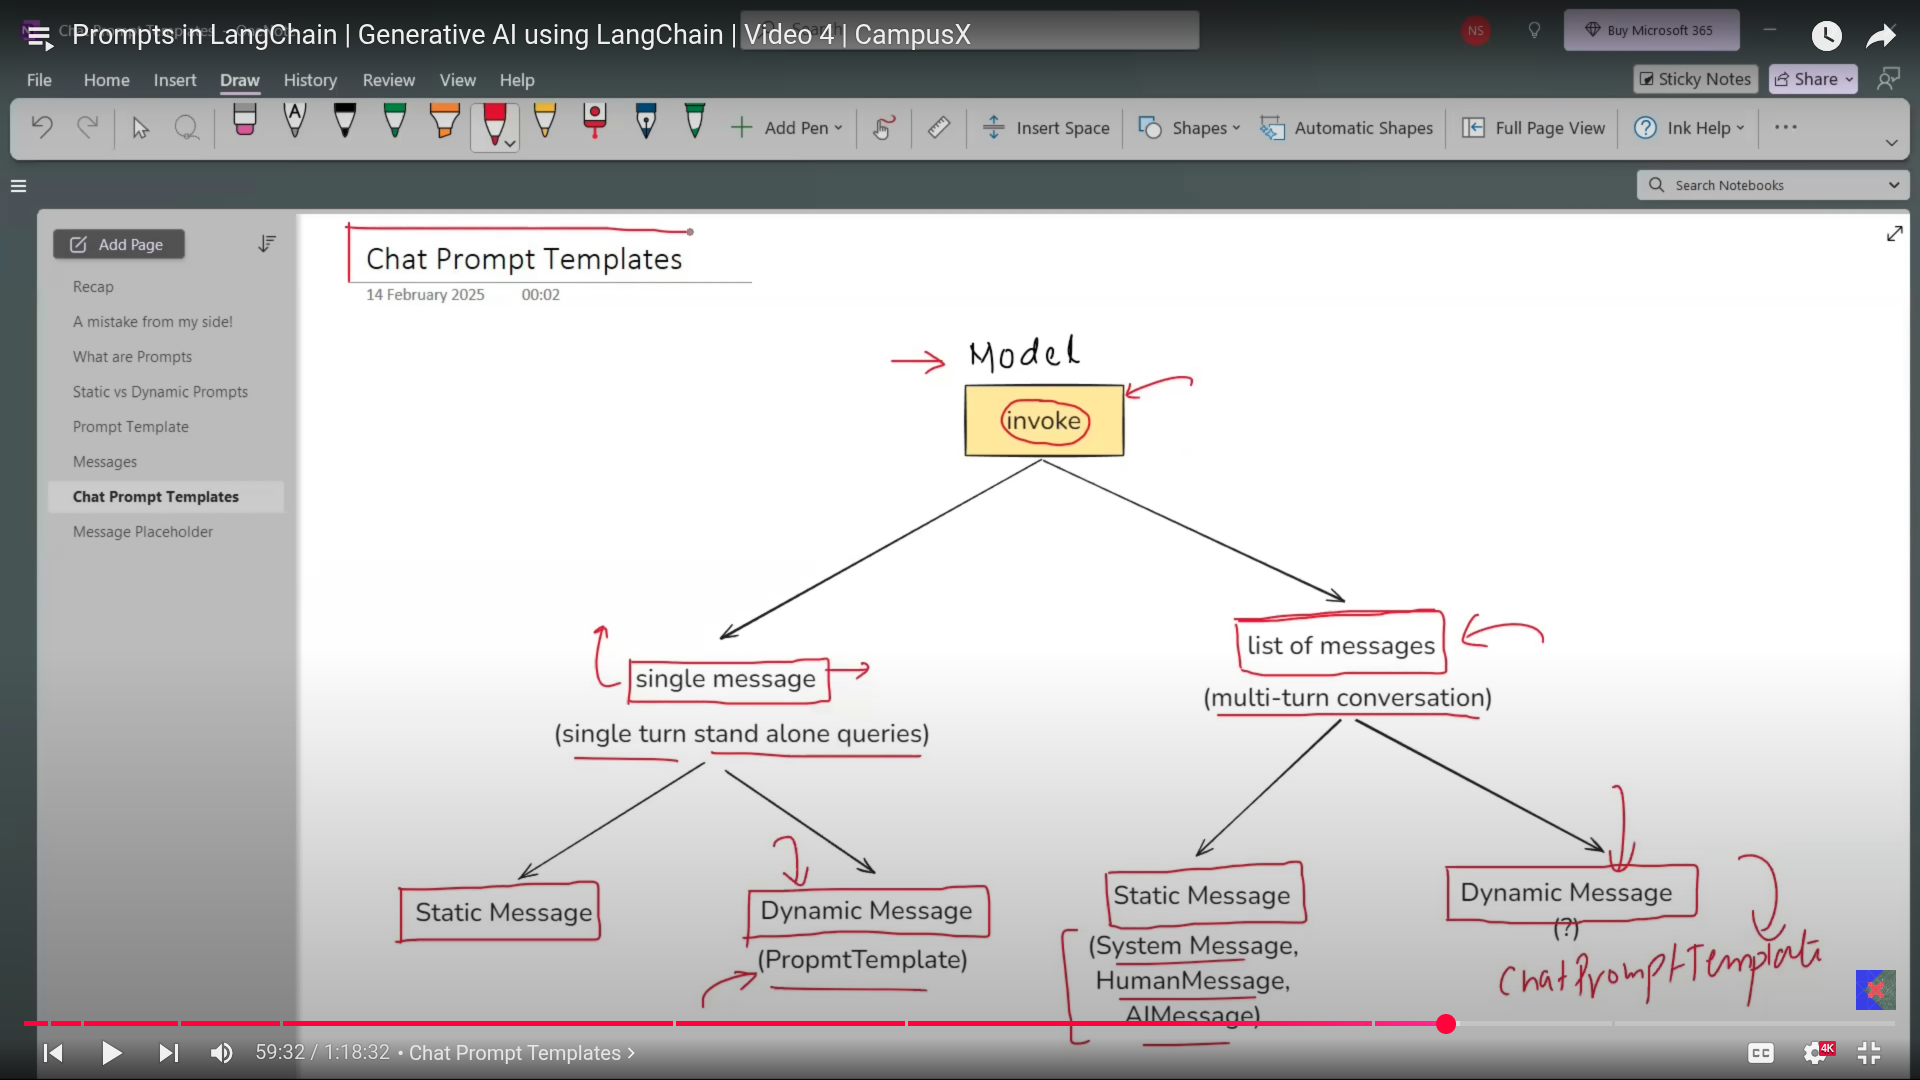

## Chat prompt Templates:
 We use this when we dealing with the listof messages
 in the dynamic messages

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

# from langchain_core.messages import SystemMessage, HumanMessage , AIMessage

# chat_template = ChatPromptTemplate([
#     SystemMessage(content='You are an helpful {domain} expert'),
#      HumanMessage(content='Eplain in simple terms , what is {topic}')
# ])

# prompt = chat_template.invoke({'domain':'cricket','topic':'DuckOut'})
## here the problem is the due to this the values are not assigned into the place holders

chat_template = ChatPromptTemplate(
    [
        ('system','You are an helpful {domain} expert'),
        ('human', 'Eplain in simple terms , what is {topic}')
    ]
)

prompt = chat_template.invoke({'domain':'cricket','topic':'DuckOut'})

print(prompt)

## Message Place HOlders

To maintian the message history for that we can palce the message
place holder


HumanMessage(content="I want to request a refund for my order #12345.")
AIMessage(content="Your refund request for order #12345 has been initiated. It will be processed in 3-5 business days.")

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

#chat template 

chat_template = ChatPromptTemplate(
    [
        ('system','you are an helpful customer support agent'),
        MessagesPlaceholder(variable_name='chat_history'),
        ('human','{query}')
    ]

)

chat_history = []
with open('2_LangChain_Prompts/3_Dynamic_prompts/worked_with/chat_history.txt') as f:
    chat_history.extend(f.readlines())

prompt = chat_template.invoke({'chat_history':chat_history, 'query': 'where is my refund'})

print(prompt)
